In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d


In [3]:
data0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/Overlap2022_11_29_10_49_25_L19_1',delimiter=',')
z0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/z_2022_11_29_10_49_25_L19_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zz_2022_11_29_10_49_25_L19_1',delimiter=',')

#data_g =np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_28/AFM_Energy_L1_15_den0.000_delta0.5_1.5_omega0.600_ramptime1.000_dt0.050_No0.csv',delimiter=',')
z0_g = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zg_2022_11_29_10_49_25_L19_1',delimiter=',')
zz0_g=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zzg_2022_11_29_10_49_25_L19_1',delimiter=',')


In [4]:
t = data0[0]
crit_id0 = np.argmin(abs(t-4))
crit_id0
print(data0[1][crit_id0])

1.2324123900096442


Crit Time 3.9888us
Crit Detuning 1.2324MHz
Correlatorof the evolved state[0.52786 0.16011 0.05674 0.02934 0.01504 0.01012 0.02208 0.0577  0.13925]
Correlator of the ground state[0.5304086907345575, 0.16384096904301793, 0.0549189818629483, 0.023172493069636757, 0.014249053015512492, 0.01643082113098271, 0.029856253811731515, 0.06134287449571307, 0.13921150942140442]


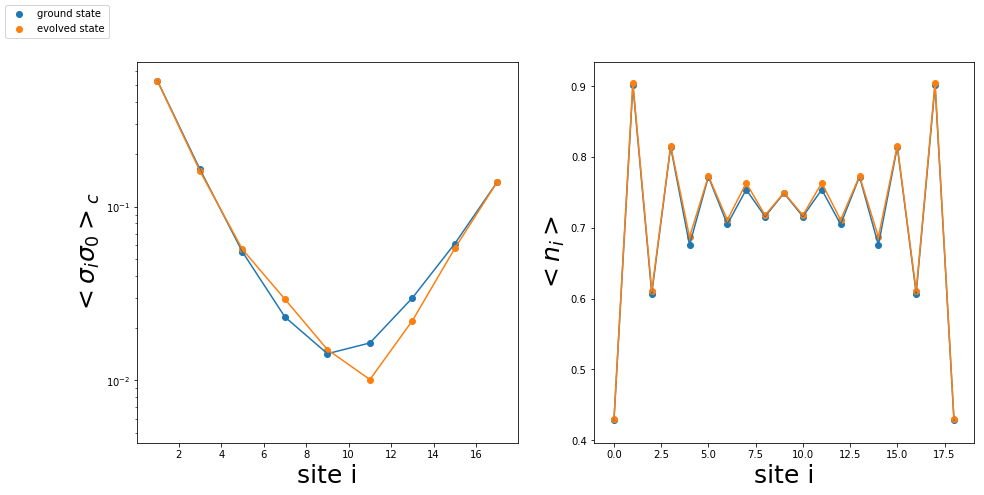

In [10]:
N = 19
center_id = int(N/2)
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
sign = np.ones(N-1)
sign[0::2]=-1
z_g = z0_g[crit_id0]
zz_g = zz0_g[crit_id0].reshape(N,N)
n_g = (1-z_g)/2
sigma_g = (n_g[0:N-1]-n_g[1:N])*sign
nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
sigma2 = []
sigma2_g = []
sigma_c_g = []
x2 = np.arange(0,N-2,2)
for i in x2:
    temp_g = ( (-1)**i * (nn_g[center_id-int(i/2),center_id+int(i/2)]\
                               +nn_g[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn_g[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn_g[center_id-int(i/2),center_id+int(i/2)+1]))
    
    sigma2_g.append(temp_g)
    sigma_c_g.append(temp_g-sigma_g[center_id-int(i/2)]*sigma_g[center_id+int(i/2)])
ax[0].scatter(x2+1,sigma2_g,label='ground state')
ax[0].plot(x2+1,sigma2_g)
ax[1].scatter(np.arange(0,N),n_g)
ax[1].plot(np.arange(0,N),n_g)

for t_id in range(crit_id0,crit_id0+1,1):

    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    sigma = (n[0:N-1]-n[1:N])*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    x = np.arange(1,N)
    sigma_c = []
    

    for i in x2:
        temp = ( (-1)**i * (nn[center_id-int(i/2),center_id+int(i/2)]\
                               +nn[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn[center_id-int(i/2),center_id+int(i/2)+1]))
        sigma2.append(temp)
        sigma_c.append(temp-sigma[center_id-int(i/2)]*sigma[center_id+int(i/2)])
    ax[0].scatter(x2+1,sigma2,label='evolved state')
    ax[0].plot(x2+1,sigma2)
    ax[0].set_xlabel('site i',fontsize = 25)
    ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
    ax[1].scatter(np.arange(0,N),n)
    ax[1].plot(np.arange(0,N),n)
    ax[1].set_xlabel('site i',fontsize = 25)
    ax[1].set_ylabel('$<n_i>$',fontsize = 25)
ax[0].set_yscale('log')
fig.legend(loc ='upper left')
print('Crit Time '+str(np.round(t[t_id],4))+'us')
print('Crit Detuning '+str(np.round(data0[1][t_id],4))+'MHz')
print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
print('Correlator of the ground state'+ str(sigma2_g))

[5.29317561e-01 1.62583867e-01 5.30524292e-02 1.98760137e-02
 7.76326280e-03 3.05742528e-03 1.15860236e-03 4.05208673e-04
 1.08899000e-04]
[0.52751582 0.16020241 0.05127161 0.01854537 0.0066937  0.00227374
 0.00059856]


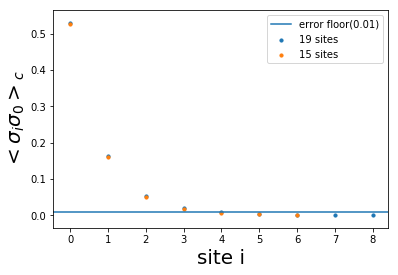

In [164]:
x1 = np.arange(0,len(tempcorrelator15))
x2 = np.arange(0,len(tempcorrelator19))
MS = 10
plt.scatter(x2,tempcorrelator19,label = '19 sites',s=MS)
plt.scatter(x1,tempcorrelator15,label = '15 sites',s=MS)
plt.axhline(0.01,label='error floor(0.01)' )
plt.xlabel('site i',fontsize = 20)
plt.ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 20)
plt.legend()
print(tempcorrelator19)
print(tempcorrelator15)

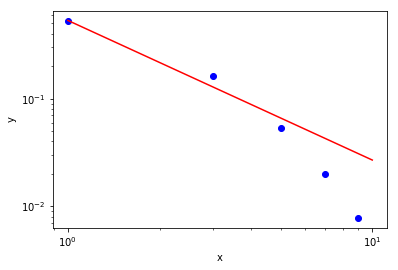

array([ 0.53281521, -1.2969301 ])

In [30]:
# define the power law function
def power_law(x, a, b):
    return a * x**b
# define the data points
xdata = np.arange(1,11,2)
ydata = sigma_c_g[0:5]
# fit the power law to the data
params, params_covariance = curve_fit(power_law, xdata, ydata)
# plot the data points
plt.plot(xdata, ydata, 'bo')
# evaluate the fitted power law function and plot it
xfit = np.linspace(1, 10, 100)
yfit = power_law(xfit, params[0], params[1])
plt.yscale('log')
plt.xscale('log')
plt.plot(xfit, yfit, 'r-')
# add labels and show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.show()
params